Carga de librerías

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from mplsoccer import VerticalPitch, Pitch
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Carga de datafrane  + transformación de escala 

In [5]:
partido_inicial=pd.read_csv('final2.csv')

# Convertir las columnas a tipo numérico
partido_inicial['Player'] = partido_inicial['Player'].str.strip()
partido_inicial['Y'] = pd.to_numeric(partido_inicial['Y'], errors='coerce')
partido_inicial['X2'] = pd.to_numeric(partido_inicial['X2'], errors='coerce')
partido_inicial['Y2'] = pd.to_numeric(partido_inicial['Y2'], errors='coerce')

# Definir los valores mínimos y máximos de X en ambas escalas
x1, x2 = 0, 100  # Escala original de X
new_x1, new_x2 = 0, 28  # Nueva escala de X

# Definir los valores mínimos y máximos de Y en ambas escalas
y1, y2 = 0, 100  # Escala original de Y
new_y1, new_y2 = 16, 0  # Nueva escala de Y

# Calcular la coordenada transformada de Y y sobrescribir la columna 'Y' con el resultado
partido_inicial['Y'] = ((new_y2 - new_y1) / (y2 - y1)) * partido_inicial['Y']*-1
partido_inicial['Y2'] = ((new_y2 - new_y1) / (y2 - y1)) * partido_inicial['Y2']*-1
# Calcular la coordenada transformada de X y sobrescribir la columna 'X' con el resultado
partido_inicial['X'] = ((new_x2 - new_x1) / (x2 - x1)) * partido_inicial['X'] 
partido_inicial['X2'] = ((new_x2 - new_x1) / (x2 - x1)) * partido_inicial['X2'] 


# Filtrar las filas donde Mins > 55 (entretiempo)
partido_rotado = partido_inicial[partido_inicial['Mins'] > 60].copy()

# Transformar las coordenadas X, Y, X2 y Y2 para las filas donde Mins > MIN ENTRETIEMPO
partido_rotado['X'] = 28 - partido_rotado['X']
partido_rotado['X2'] = 28 - partido_rotado['X2']
partido_rotado['Y'] = 16 - partido_rotado['Y']
partido_rotado['Y2'] = 16 - partido_rotado['Y2']

# Combinar las filas transformadas con las filas originales donde Mins <= MIN ENTRETIEMPO
partido = pd.concat([partido_inicial[partido_inicial['Mins'] <= 60], partido_rotado])


partido_gevp = partido[(partido['Team'] == 'GEVP')]
partido_sitas = partido[(partido['Team'] == 'SITAS')]
# Mostrar las últimas filas del DataFrame combinado
print(partido.head(120))

      Team Player    Event  Mins  Secs      X      Y     X2     Y2
0    SITAS      2     Pase    32    40  23.80   4.96  19.04   0.64
1    SITAS      9     Pase    32    44  19.32   0.64  19.04   6.88
2    SITAS      2     Pase    32    45  19.32   6.56  14.00   7.52
3    SITAS     11     Pase    32    47  14.28   8.00  13.16  12.96
4    SITAS      7     Pase    32    49  12.88  13.44   9.24  15.36
..     ...    ...      ...   ...   ...    ...    ...    ...    ...
115   GEVP     11   Errado    36    55  25.76   7.36    NaN    NaN
116  SITAS      2  reb_def    36    55  22.96   6.24    NaN    NaN
117  SITAS      2     Pase    36    56  22.96   6.24  17.92   3.52
118  SITAS      8  Perdida    36    58  17.92   3.52    NaN    NaN
119   GEVP      5     Pase    37     4  20.16   4.48  22.40   8.48

[120 rows x 9 columns]


Leo players en aprtido

In [37]:

goles_gevp = partido[partido['Event'].isin(['Gol']) 
                     & (partido['Team'] == 'GEVP')]

errados_gevp = partido[partido['Event'].isin(['Errado']) 
                     & (partido['Team'] == 'GEVP')]

goles_sitas = partido[partido['Event'].isin(['Gol']) 
                      & (partido['Team'] == 'SITAS')]
                   #   & (partido['Player'] == '10')]

errados_sitas = partido[partido['Event'].isin(['Errado']) 
                      & (partido['Team'] == 'SITAS')]



,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
34,GEVP,12,Errado,33,46,19.60,3.68,NaN,NaN
49,GEVP,2,Errado,34,15,21.28,8.00,NaN,NaN
115,GEVP,11,Errado,36,55,25.76,7.36,NaN,NaN
120,GEVP,2,Errado,37,6,23.52,10.72,NaN,NaN
133,GEVP,11,Errado,37,33,22.96,2.88,NaN,NaN
276,GEVP,12,Errado,43,8,17.92,13.76,NaN,NaN
278,GEVP,11,Errado,43,9,24.64,5.76,NaN,NaN
377,GEVP,11,Errado,46,58,20.44,9.92,NaN,NaN
395,GEVP,2,Errado,47,48,26.04,8.16,NaN,NaN
466,GEVP,11,Errado,50,38,24.36,6.24,NaN,NaN


In [42]:
def generar_mapa_tiros(df_goles, df_errados, ax):
    
    #minutes =  dataframe#[(dataframe['Mins'] >= minuto_inicial) & (dataframe['Mins'] <= minuto_final)]
    
    pitch=Pitch(goal_type='box')
    
    pitch.scatter(
        partido[partido['Event'].isin(['Gol']) 
                      & (partido['Team'] == 'SITAS')]
                      & (partido['Player'] == '10').X,df_goles.Y, ax=ax, alpha=.6, ec='black', label='Goles', color='blue', zorder=.99)
    pitch.scatter(df_errados.X,df_errados.Y, ax=ax, alpha=.6, ec='black', label='Errados',color='red', zorder=.99)
    plt.legend()
   # Definir las dimensiones del campo
    ancho = 16
    alto = 28

    
    # Dibujar el rectángulo del campo (fondo blanco)
    ax.add_patch(plt.Rectangle((0, 0), ancho, alto, fill=True, color='white', alpha=0.1))

    # Dibujar las líneas de la cancha
    ax.plot([0, ancho], [0, 0], color='black', linewidth=2)  # Línea de fondo
    ax.plot([0, ancho], [alto, alto], color='black', linewidth=2)  # Otra línea de fondo
    ax.plot([0, ancho], [alto/2, alto/2], color='black', linewidth=1)  # Línea central
    ax.plot([0, 0], [0, alto], color='black', linewidth=2)  # Línea lateral izquierda
    ax.plot([ancho, ancho], [0, alto], color='black', linewidth=3)  # Línea lateral derecha


    # Dibujar lineas de penal

    ax.plot( [7.5, 8.5],[ (alto /2)*1.33,  (alto /2)*1.33], color='black', linewidth=2)  # Línea penal
    ax.plot( [7.5, 8.5],[ (alto /2)*0.66,  (alto/2 )*0.66], color='black', linewidth=2)  # Línea penal

    #Aros

    ax.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=0.5, fill=False, color='red', linewidth=2))
    ax.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=0.5, fill=False, color='red', linewidth=2))

    #Circulo de rebote

    ax.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))
    ax.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))


    # Configurar los ejes
    ax.set_xlim(0, ancho)
    ax.set_ylim(0, alto)
    ax.set_aspect('equal')
    plt.axis('OFF')  # Ocultar ejes

   
    #TITLE_TEXT = f'Min {minuto_inicial}-{minuto_final}'
   # text2 = f'Jugadora N°{df_player['Player'].iloc[0]}'
    #ax.text(0, 25, TITLE_TEXT, color='#c7d5cc', va='center', ha='center', fontsize=16)
  #  ax.text(0, 30, text2, color='#c7d5cc', va='center', ha='center', fontsize=18)

C:\Users\santi\AppData\Local\Temp\ipykernel_5700\621608388.py:108: RuntimeWarning:

invalid value encountered in scalar divide



Text(19, 21, 'nan %\nEfectividad')

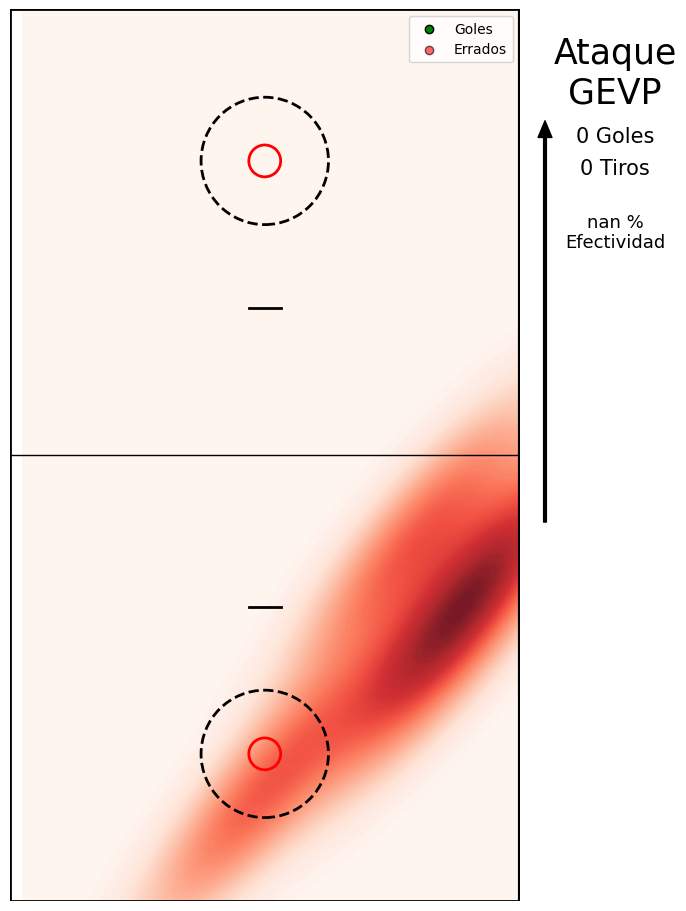

In [166]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
# Agregar un título a la figura
#fig.suptitle('Jug 11 - SITAS', fontsize=20, color='black')
gs = fig.add_gridspec(nrows=1,ncols=1)
fig.set_facecolor('white')

ax1 = fig.add_subplot(gs[0,0])



goles_gevp = partido[partido['Event'].isin(['Gol']) 
                     & (partido['Team'] == 'GEVP')]

errados_gevp = partido[partido['Event'].isin(['Errado']) 
                     & (partido['Team'] == 'GEVP')]

goles_sitas = partido[partido['Event'].isin(['Gol']) 
                      & (partido['Team'] == 'GEVP')
                      & (partido['Player'] == '13')]

errados_sitas = partido[partido['Event'].isin(['Errado']) 
                      & (partido['Team'] == 'GEVP') & (partido['Player'] == '13')]

gol_count = goles_sitas['Event'].eq('Gol').sum()
tiros_count = goles_sitas['Event'].eq('Gol').sum() + errados_sitas['Event'].eq('Errado').sum()

# Identificar los índices de los eventos 'Gol' de equipos que no sean 'GEVP'
gol_indices = partido[(partido['Event'] == 'Gol') & (partido['Team'] != 'GEVP')].index

# Identificar los índices de los eventos 'Pase' que siguen a un evento 'Gol' del paso anterior
pase_indices_to_remove = [i + 1 for i in gol_indices if i + 1 in partido.index and partido.loc[i + 1, 'Event'] == 'Pase']

# Crear un nuevo DataFrame excluyendo los eventos 'Pase' identificados
df_filtered = partido.drop(pase_indices_to_remove)

# Si deseas aplicar esta lógica solo a los datos filtrados iniciales
df_player_sitas = df_filtered[(df_filtered['Team'] == 'GEVP') &
                         (df_filtered['Player'] == '13') & 
                         (~partido['Event'].isin(['sub_in', 'sub_out']))]  

# Mostrar el DataFrame resultante
df_player_sitas

pitch=Pitch(goal_type='box')


pitch.kdeplot(
        df_player_sitas['Y'],
        df_player_sitas['X'],
        ax=ax1,
        levels=100,
        fill=True,
        zorder=0,
        shade_lowest=True,
        cmap='Reds')


pitch.scatter(goles_sitas.Y,goles_sitas.X, ax=ax1, alpha=1, ec='black', label='Goles', color='green', zorder=.99)
pitch.scatter(errados_sitas.Y,errados_sitas.X, ax=ax1, alpha=.6, ec='black', label='Errados',color='red', zorder=.99)
plt.legend()
#plt.legend(ncol=2, loc='lower center', prop={'size' : 16}, shadow=True, edgecolor='black')

# Definir las dimensiones del campo
ancho = 16
alto = 28
   
# Dibujar el rectángulo del campo (fondo blanco)
ax1.add_patch(plt.Rectangle((0, 0), ancho, alto, fill=True, color='white', alpha=0.1))

# Dibujar las líneas de la cancha
ax1.plot([0, ancho], [0, 0], color='black', linewidth=2)  # Línea de fondo
ax1.plot([0, ancho], [alto, alto], color='black', linewidth=2)  # Otra línea de fondo
ax1.plot([0, ancho], [alto/2, alto/2], color='black', linewidth=1)  # Línea central
ax1.plot([0, 0], [0, alto], color='black', linewidth=2)  # Línea lateral izquierda
ax1.plot([ancho, ancho], [0, alto], color='black', linewidth=3)  # Línea lateral derecha


    # Dibujar lineas de penal

ax1.plot( [7.5, 8.5],[ (alto /2)*1.33,  (alto /2)*1.33], color='black', linewidth=2)  # Línea penal
ax1.plot( [7.5, 8.5],[ (alto /2)*0.66,  (alto/2 )*0.66], color='black', linewidth=2)  # Línea penal

    #Aros

ax1.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=0.5, fill=False, color='red', linewidth=2))
ax1.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=0.5, fill=False, color='red', linewidth=2))

    #Circulo de rebote

ax1.add_patch(plt.Circle((ancho/2 , (alto /2)*1.66), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))
ax1.add_patch(plt.Circle((ancho/2 , (alto/2 )*0.33), radius=2, fill=False, color='black', linewidth=2, linestyle='--'))


    # Configurar los ejes
ax1.set_xlim(0, ancho)
ax1.set_ylim(0, alto)
ax1.set_aspect('equal')
plt.axis('OFF')  # Ocultar ejes


ax1.annotate('', xy=(1.05, 0.9), xytext=(1.05, 0.4),
             arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=10),
             xycoords='axes fraction')

ax1.text(19, 26, 'Ataque\nGEVP', va='center', ha='center', fontsize=25)
ax1.text(19, 24, f'{gol_count} Goles', va='center', ha='center', fontsize=15)
ax1.text(19, 23, f'{tiros_count} Tiros', va='center', ha='center', fontsize=15)
ax1.text(19, 21, f'{(gol_count / tiros_count) * 100:.2f} %\nEfectividad', va='center', ha='center', fontsize=13)
#ax1.text(90, 90, f'{goles_sitas} Goles', va='center', ha='center', fontsize=20)




# Aquí, invertimos los ejes
#ax1.invert_xaxis()
#ax1.invert_yaxis()